Proyecciones aleatorias --- 6:53 min
===

* 6:53 min | Última modificación: Octubre 7, 2021 | [YouTube](https://youtu.be/uEqj6TF7EHo)

Son métodos eficientes para reducir la dimensionalidad de los datos que intentan conservar al máximo las propiedades de estos. 

La **proyección gaussiana aleatoria** reduce el espacio original de caracaterísticas en una matriz generada aleatoriamente, cuyos elementos son muestreados de una distribución normal:

$$
N \left( 
0, \frac{1}{n_\text{components}} 
\right)
$$

In [1]:
import numpy as np
from sklearn.random_projection import GaussianRandomProjection

X = np.random.rand(100, 10000)

gaussianRandomProjection = GaussianRandomProjection(
    # -----------------------------------------------------
    # Dimensionality of the target projection space.
    #   int
    #   'auto'
    n_components="auto",
    # -----------------------------------------------------
    # Semilla del generador de aleatorios
    # None
    # int
    random_state=1234,
)

X_new = gaussianRandomProjection.fit_transform(X)
X_new.shape

(100, 3947)

In [2]:
#
# Número de componentes
#
gaussianRandomProjection.n_components_

3947

In [3]:
#
# Componentes
#
gaussianRandomProjection.components_.shape

(3947, 10000)

En la proyección aleatoria dispersa se reduce la dimensionalidad de la muestra de datos usando una matriz aleatoria dispersa. Esta alternativa es más eficiente que la anterior. Los elementos de la matriz son muestreados de:

$$
\begin{cases}
- \sqrt{\frac{s}{n_\text{components}}} & \text{  con probabilidad  } 1/2s \\
0 & \text{  con probabilidad  } 1 - \frac{1}{s} \\
+ \sqrt{\frac{s}{n_\text{components}}} &  \text{  con probabilidad  } 1/2s \\
\end{cases}
$$



donde

$$
s = \frac{1}{\text{density}}
$$

y

$$
\text{density} \propto \frac{1}{\sqrt{n_\text{features}}}
$$

In [4]:
import numpy as np
from sklearn.random_projection import SparseRandomProjection

X = np.random.rand(100, 10000)

sparseRandomProjection = SparseRandomProjection(
    # -----------------------------------------------------
    # Dimensionality of the target projection space.
    #   int
    #   'auto'
    n_components="auto",
    # -----------------------------------------------------
    # Ratio in the range (0, 1] of non-zero component in
    # the random projection matrix.
    #   float
    #   'auto'
    density="auto",
    # -----------------------------------------------------
    # Semilla del generador de aleatorios
    # None
    # int
    random_state=1234,
)
X_new = sparseRandomProjection.fit_transform(X)
X_new.shape

(100, 3947)

https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

In [5]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=6, return_X_y=False)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

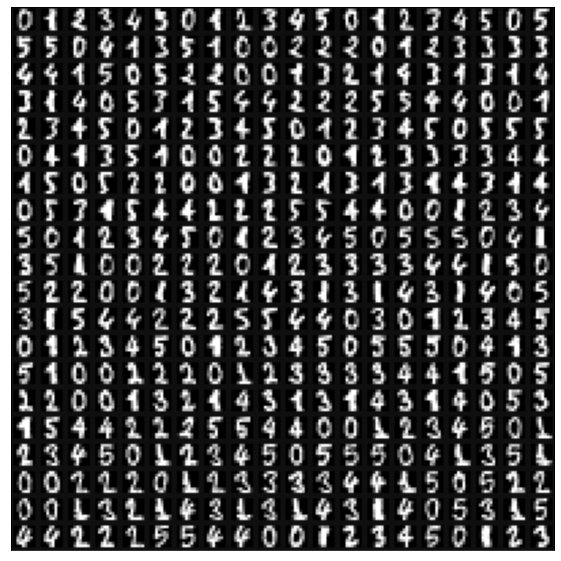

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix : ix + 8, iy : iy + 8] = 1 - X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
sparseRandomProjection = SparseRandomProjection(
    n_components=2,
    random_state=42,
)

X_projected = sparseRandomProjection.fit_transform(X)

x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)

X_scaled = (X_projected - x_min) / (x_max - x_min)

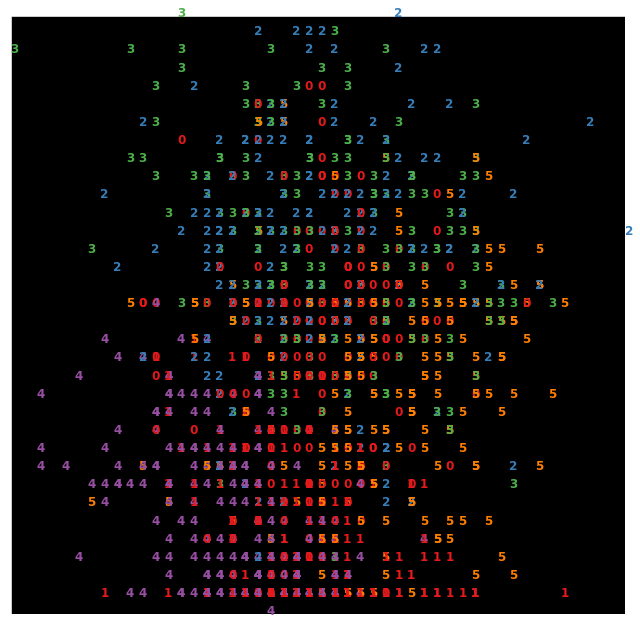

In [8]:
from matplotlib import offsetbox

plt.figure(figsize=(11, 11))
plt.style.use("dark_background")

for i in range(X_scaled.shape[0]):

    plt.text(
        X_scaled[i, 0],
        X_scaled[i, 1],
        str(y[i]),
        color=plt.cm.Set1(y[i] / 10.0),
        fontdict={"weight": "bold", "size": 12},
    )


plt.xticks([])
plt.yticks([])
plt.show()